# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [ ]:
# Read the hour.csv file
df = pd.read_csv('hour.csv')

print the first five rows of dataset

In [ ]:
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [ ]:
df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [ ]:
df.shape

(17379, 17)

In [ ]:
for col in df.columns:
  print(f"=== {col}")
  cu = df[col].unique()
  if len(cu) > 24:
    print("total unique values:", len(cu))
  else:
    print("unique values:", cu)

  print()

=== instant
total unique values: 17379

=== dteday
total unique values: 731

=== season
unique values: [1 2 3 4]

=== yr
unique values: [0 1]

=== mnth
unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12]

=== hr
unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

=== holiday
unique values: [0 1]

=== weekday
unique values: [6 0 1 2 3 4 5]

=== workingday
unique values: [0 1]

=== weathersit
unique values: [1 2 3 4]

=== temp
total unique values: 50

=== atemp
total unique values: 65

=== hum
total unique values: 89

=== windspeed
total unique values: 30

=== casual
total unique values: 322

=== registered
total unique values: 776

=== cnt
total unique values: 869



### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

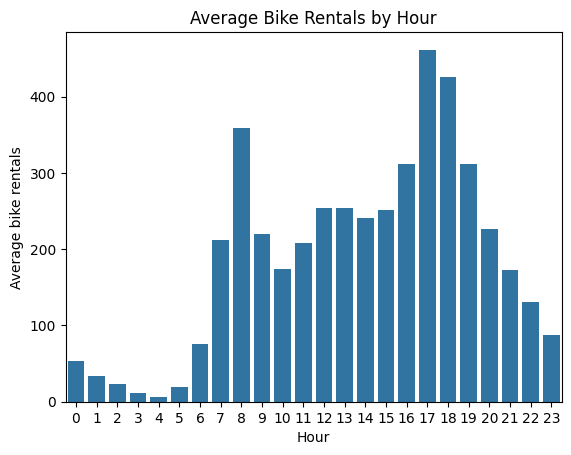

In [ ]:
sns.barplot(x='hr', y='cnt', data=df, errorbar=None)
plt.xlabel('Hour')
plt.ylabel('Average bike rentals')
plt.title('Average Bike Rentals by Hour')
plt.show()

In [ ]:
df.groupby('hr')['cnt'].mean()

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


#### Visualize the distribution of count, casual and registered variables

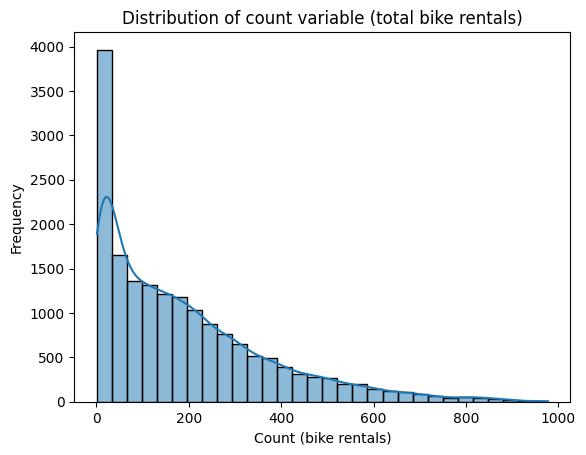

In [ ]:
# YOUR CODE HERE for distribuiton of count variable
sns.histplot(x='cnt', data=df, kde=True, bins=30)
plt.title("Distribution of count variable (total bike rentals)")
plt.xlabel("Count (bike rentals)")
plt.ylabel("Frequency")
plt.show()

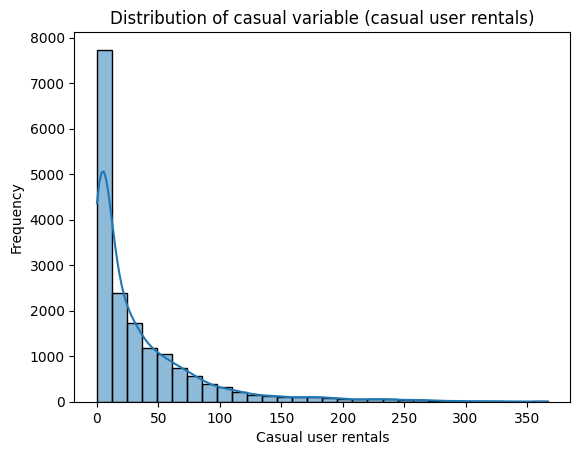

In [ ]:
# YOUR CODE HERE for distribuiton of casual variable
sns.histplot(x='casual', data=df, kde=True, bins=30)
plt.title("Distribution of casual variable (casual user rentals)")
plt.xlabel("Casual user rentals")
plt.ylabel("Frequency")
plt.show()

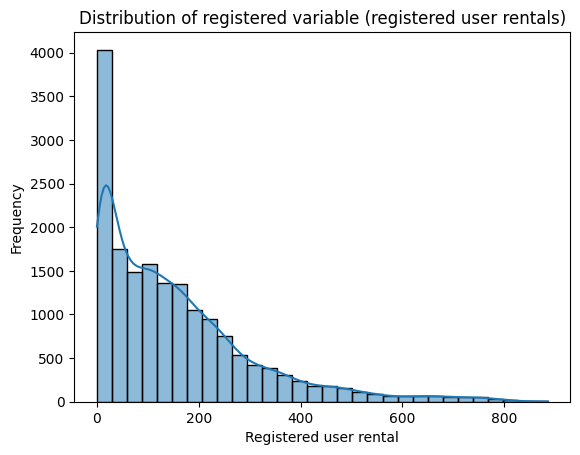

In [ ]:
# YOUR CODE HERE for distribuiton of registered variable
sns.histplot(x='registered', data=df, kde=True, bins=30)
plt.title("Distribution of registered variable (registered user rentals)")
plt.xlabel("Registered user rental")
plt.ylabel("Frequency")
plt.show()

#### Describe the relation of weekday, holiday and working day

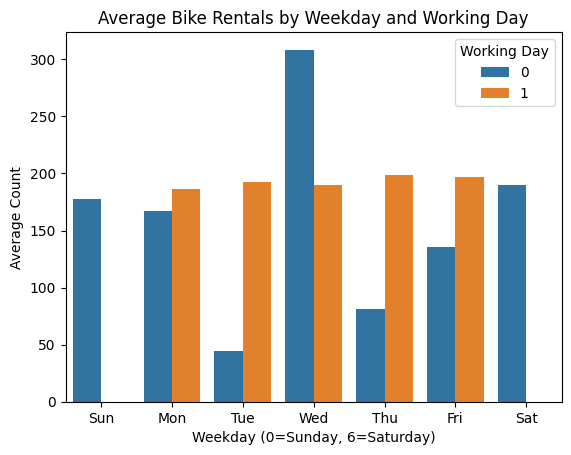

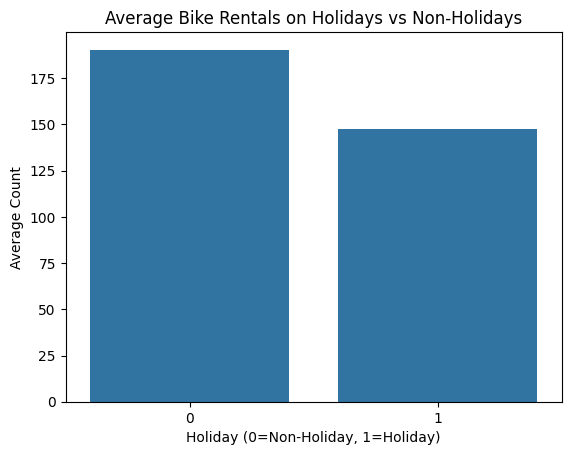

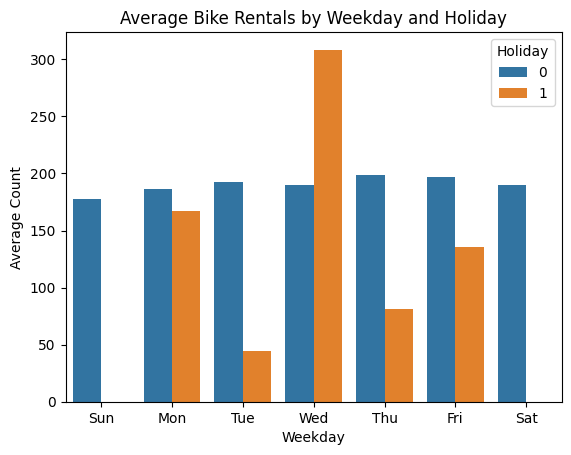

In [ ]:
weekday_data = df[['weekday', 'holiday', 'workingday', 'cnt']]

# Aggregate data by weekday, holiday, and workingday for average counts
agg_data = weekday_data.groupby(['weekday', 'holiday', 'workingday']).mean().reset_index()

# Plot the relationship between weekday and average count
sns.barplot(x='weekday', y='cnt', hue='workingday', data=agg_data)
plt.title('Average Bike Rentals by Weekday and Working Day')
plt.xlabel('Weekday (0=Sunday, 6=Saturday)')
plt.ylabel('Average Count')
plt.xticks(range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.legend(title='Working Day', loc='upper right')
plt.show()

# Plot the relationship between holiday and average count
sns.barplot(x='holiday', y='cnt', data=agg_data, errorbar=None)
plt.title('Average Bike Rentals on Holidays vs Non-Holidays')
plt.xlabel('Holiday (0=Non-Holiday, 1=Holiday)')
plt.ylabel('Average Count')
plt.show()

# Plot the combined relationship between weekday, holiday, and count
sns.barplot(x='weekday', y='cnt', hue='holiday', data=agg_data)
plt.title('Average Bike Rentals by Weekday and Holiday')
plt.xlabel('Weekday')
plt.ylabel('Average Count')
plt.xticks(range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.legend(title='Holiday', loc='upper right')
plt.show()

# Describe the relation of weekday, holiday and working day
# df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in (0, 6) else 0)
# condition = (df['is_weekend'] == 1) | (df['holiday'] == 1)
# result = df[condition]['workingday'].unique()
# print(f"Unique values of 'workingday' when it's a weekend or holiday: {result}")
# condition = (df['is_weekend'] == 0) & (df['holiday'] == 0)
# result = df[condition]['workingday'].unique()
# print(f"Unique values of 'workingday' when it's not a weekend or holiday: {result}")

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

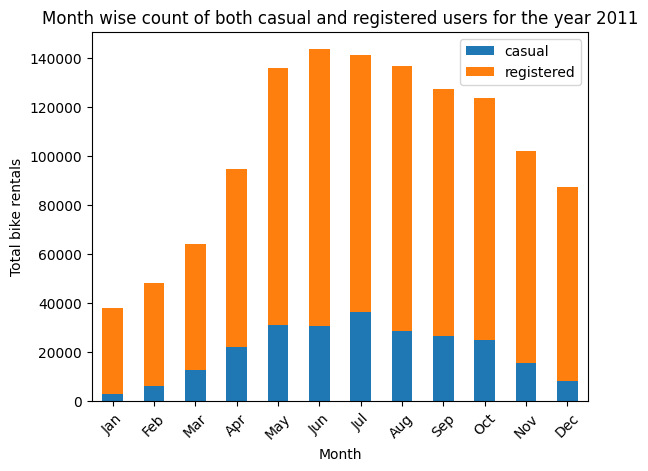

In [ ]:
# stacked bar chart for year 2011
data_2011 = df[df['yr'] == 0].groupby('mnth')[['casual', 'registered']].sum()
data_2011.plot(kind='bar', stacked=True)
plt.xticks(range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.xlabel("Month")
plt.ylabel("Total bike rentals")
plt.title("Month wise count of both casual and registered users for the year 2011")
plt.show()


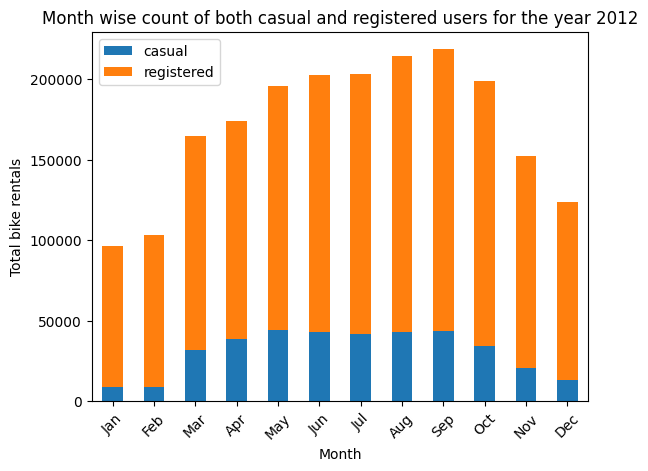

In [ ]:
# stacked bar chart for year 2012
data_2011 = df[df['yr'] == 1].groupby('mnth')[['casual', 'registered']].sum()
data_2011.plot(kind='bar', stacked=True)
plt.xticks(range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.xlabel("Month")
plt.ylabel("Total bike rentals")
plt.title("Month wise count of both casual and registered users for the year 2012")
plt.show()

#### Analyze the correlation between features with heatmap

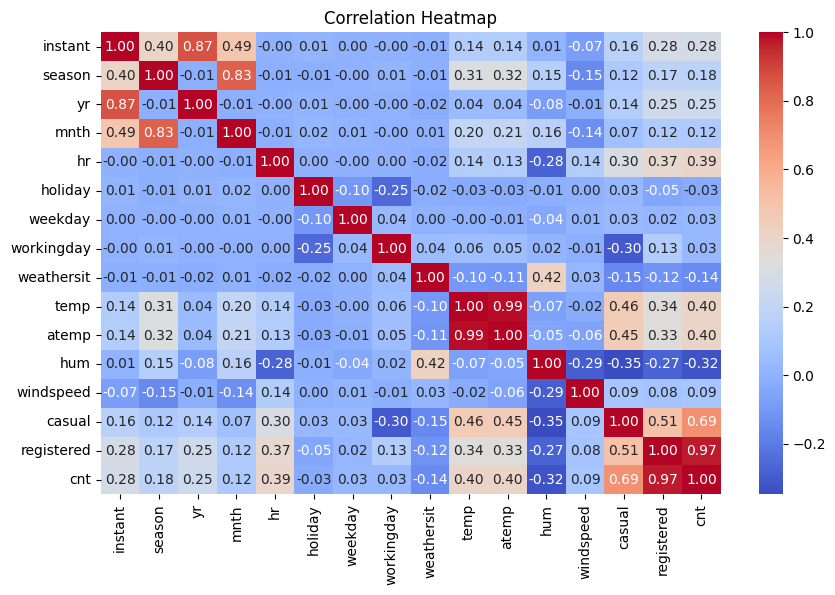

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Visualize the box plot of casual and registered variables to check the outliers

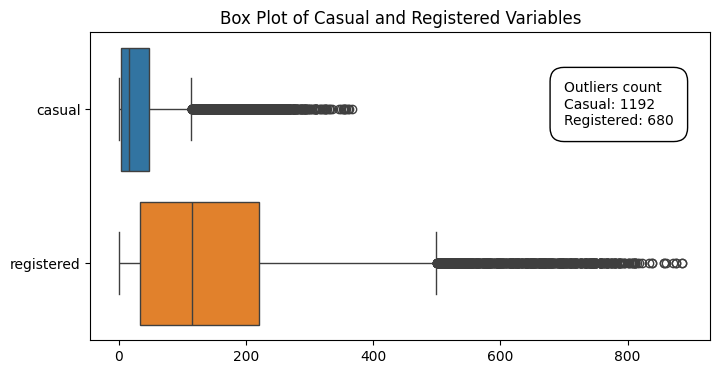

In [ ]:
outliers_count = {}
for column in ['casual', 'registered']:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

plt.figure(figsize=(8, 4))
sns.boxplot(df[['casual', 'registered']], orient='h')
plt.title("Box Plot of Casual and Registered Variables")
plt.text(700, .1, f"Outliers count\nCasual: {outliers_count['casual']}\nRegistered: {outliers_count['registered']}", bbox={"facecolor": "white", "edgecolor": "black", "boxstyle": "round, pad=1"})
plt.show()

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [ ]:
# other fields that can be removed. low correlation - holiday, weekday, workingday, windspeed, mnth, season, year, weathersit. highly correlated feature - temp
df_cleaned = df.drop(['instant', 'dteday', 'cnt', 'casual', 'registered', 'temp'], axis=1)
df_cleaned.head(10)

# df_cor = df.corr().abs()
# one_side = df_cor.where(np.triu(np.ones(df_cor.shape), k=1).astype(bool))
# drop_col = [column for column in one_side.columns if any(one_side[column]>0.9)]
# df.drop(drop_col, axis =1 , inplace = True)
# df.drop('dteday', axis = 1, inplace = True)
# df.columns

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,is_weekend
0,1,0,1,0,0,6,0,1,0.2879,0.81,0.0000,1
1,1,0,1,1,0,6,0,1,0.2727,0.80,0.0000,1
2,1,0,1,2,0,6,0,1,0.2727,0.80,0.0000,1
3,1,0,1,3,0,6,0,1,0.2879,0.75,0.0000,1
4,1,0,1,4,0,6,0,1,0.2879,0.75,0.0000,1
5,1,0,1,5,0,6,0,2,0.2576,0.75,0.0896,1
6,1,0,1,6,0,6,0,1,0.2727,0.80,0.0000,1
7,1,0,1,7,0,6,0,1,0.2576,0.86,0.0000,1
8,1,0,1,8,0,6,0,1,0.2879,0.75,0.0000,1
9,1,0,1,9,0,6,0,1,0.3485,0.76,0.0000,1


#### Identify categorical and continuous variables


In [ ]:
categorical_variables = [col for col in df_cleaned.columns if df_cleaned[col].nunique() < 25 or df_cleaned[col].dtype == 'object' ]
continuous_variables = [col for col in df_cleaned.columns if col not in categorical_variables]

print("Categorical variables:", categorical_variables)
print("Continuous variables:", continuous_variables)

Categorical variables: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'is_weekend']
Continuous variables: ['atemp', 'hum', 'windspeed']


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [ ]:
print("Continuous variables:", continuous_variables)

scaler = StandardScaler()
df_cleaned[continuous_variables] = scaler.fit_transform(df_cleaned[continuous_variables])
df_cleaned.head(10)

Continuous variables: ['atemp', 'hum', 'windspeed']


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,is_weekend
0,1,0,1,0,0,6,0,1,-1.093281,0.947372,-1.553889,1
1,1,0,1,1,0,6,0,1,-1.181732,0.895539,-1.553889,1
2,1,0,1,2,0,6,0,1,-1.181732,0.895539,-1.553889,1
3,1,0,1,3,0,6,0,1,-1.093281,0.636370,-1.553889,1
4,1,0,1,4,0,6,0,1,-1.093281,0.636370,-1.553889,1
5,1,0,1,5,0,6,0,2,-1.269602,0.636370,-0.821484,1
6,1,0,1,6,0,6,0,1,-1.181732,0.895539,-1.553889,1
7,1,0,1,7,0,6,0,1,-1.269602,1.206542,-1.553889,1
8,1,0,1,8,0,6,0,1,-1.093281,0.636370,-1.553889,1
9,1,0,1,9,0,6,0,1,-0.740638,0.688203,-1.553889,1


In [ ]:
print("Continuous variables:", continuous_variables)

scaler_mm = MinMaxScaler()
df_cleaned_copy = df_cleaned.copy()
df_cleaned_copy[continuous_variables] = scaler_mm.fit_transform(df_cleaned_copy[continuous_variables])
df_cleaned_copy.head(10)

Continuous variables: ['temp', 'atemp', 'hum', 'windspeed']


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.224490,0.2879,0.81,0.000000
1,1,0,1,1,0,6,0,1,0.204082,0.2727,0.80,0.000000
2,1,0,1,2,0,6,0,1,0.204082,0.2727,0.80,0.000000
3,1,0,1,3,0,6,0,1,0.224490,0.2879,0.75,0.000000
4,1,0,1,4,0,6,0,1,0.224490,0.2879,0.75,0.000000
5,1,0,1,5,0,6,0,2,0.224490,0.2576,0.75,0.105325
6,1,0,1,6,0,6,0,1,0.204082,0.2727,0.80,0.000000
7,1,0,1,7,0,6,0,1,0.183673,0.2576,0.86,0.000000
8,1,0,1,8,0,6,0,1,0.224490,0.2879,0.75,0.000000
9,1,0,1,9,0,6,0,1,0.306122,0.3485,0.76,0.000000


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
print("Categorical variables:", categorical_variables)

# initialize, drop='first' to avoid multicollinearity problem
encoder = OneHotEncoder(sparse_output=False, drop="first")

# fit and transform the categorical variables
encoded_data = encoder.fit_transform(df_cleaned[categorical_variables])

# create a dataframe for the encoded variables
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables), index=df_cleaned.index)

# Add the encoded data to the original dataset (excluding original categorical columns)
df_cleaned = pd.concat([df_cleaned.drop(columns=categorical_variables), encoded_df], axis=1)

print(df_cleaned.columns)
df_cleaned.head()

Categorical variables: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'is_weekend']
Index(['atemp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1', 'hr_2', 'hr_3',
       'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
       'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4',
       'is_weekend_1'],
      dtype='object')


,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4,is_weekend_1
0,-1.093281,0.947372,-1.553889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.181732,0.895539,-1.553889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.181732,0.895539,-1.553889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.093281,0.636370,-1.553889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-1.093281,0.636370,-1.553889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Specify features and targets after applying scaling and one-hot encoding

In [ ]:
X = df_cleaned[df_cleaned.columns]
y = df["cnt"]

print("Features X:", X.head())
print("Target Y:", y.head())

Features X:       atemp       hum  windspeed  season_2  season_3  season_4  yr_1  mnth_2  \
0 -1.093281  0.947372  -1.553889       0.0       0.0       0.0   0.0     0.0   
1 -1.181732  0.895539  -1.553889       0.0       0.0       0.0   0.0     0.0   
2 -1.181732  0.895539  -1.553889       0.0       0.0       0.0   0.0     0.0   
3 -1.093281  0.636370  -1.553889       0.0       0.0       0.0   0.0     0.0   
4 -1.093281  0.636370  -1.553889       0.0       0.0       0.0   0.0     0.0   

   mnth_3  mnth_4  ...  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
0     0.0     0.0  ...        0.0        0.0        0.0        0.0        1.0   
1     0.0     0.0  ...        0.0        0.0        0.0        0.0        1.0   
2     0.0     0.0  ...        0.0        0.0        0.0        0.0        1.0   
3     0.0     0.0  ...        0.0        0.0        0.0        0.0        1.0   
4     0.0     0.0  ...        0.0        0.0        0.0        0.0        1.0   

   workingday_1  wea

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset size:", df.shape[0])
print("X_train (training data size):", X_train.shape[0])
print("X_test (test data size):", X_test.shape[0])
print("y_train:", y_train.shape[0])
print("y_test:", y_test.shape[0])

Dataset size: 17379
X_train (training data size): 13903
X_test (test data size): 3476
y_train: 13903
y_test: 3476


#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# add bias
print("Before bias:", X_train[:1])
X_train_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]
print("After bias:", X_train_intercept[:1])

Before bias:         atemp       hum  windspeed  season_2  season_3  season_4  yr_1  \
335 -1.622245 -0.400306   0.276306       0.0       0.0       0.0   0.0   

     mnth_2  mnth_3  mnth_4  ...  weekday_2  weekday_3  weekday_4  weekday_5  \
335     0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   

     weekday_6  workingday_1  weathersit_2  weathersit_3  weathersit_4  \
335        1.0           0.0           0.0           0.0           0.0   

     is_weekend_1  
335           1.0  

[1 rows x 53 columns]
After bias: [[ 1.         -1.62224482 -0.40030647  0.27630622  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.    

In [ ]:
# normal equation
theta = np.linalg.inv(X_train_intercept.T.dot(X_train_intercept)).dot(X_train_intercept.T).dot(y_train)
print("Coefficients using normal equation:")
print(theta)
print()

# normal equation using least-squares
import scipy
theta, _, _, _ = scipy.linalg.lstsq(X_train_intercept, y_train)
print("Coefficients using least-squares:")
print(theta)

Coefficients using normal equation:
[ 2650.82743968   189.21233084    -8.59397023     6.15673242
   195.40325576   250.53604909    37.12830828    59.13103145
   -42.6623752   -104.16684939  -281.28828124  -299.25275063
  -450.35823878  -491.28213644  -531.11530431  -352.56120725
   -86.78579736    24.51617862    27.4159023    -39.0353392
     7.17395692   -67.17647064   -37.54725152   -11.65761205
    47.11175744   182.873218     293.25276384   165.84352143
    76.21384648    70.04368073   127.39337739    76.25280537
   110.20649901    80.70156306   140.30008337   322.14526856
   310.67646299   172.70280955   159.98987814    80.3560388
    53.00382728    19.76232451   390.04562102 -2801.27346917
 -3887.36933113 -2504.72583376 -4272.49842406 -2069.08835016
    16.49014659   459.88183781   -10.94066744   -64.21149707
  -127.75877864 -2018.66787367]

Coefficients using least-squares:
[-1.11026613e+14  4.02812500e+01 -1.60468750e+01 -3.04687500e+00
  3.35625000e+01  3.11093750e+01  6.86484

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [ ]:
def batch_gradient_descent(X, y, alpha=0.001, iterations=1000):
    cost_history = [0] * iterations
    m = len(y)
    theta = np.zeros(X.shape[1])
    for iteration in range(iterations):
        h = X.dot(theta)
        loss = h - y
        gradient = X.T.dot(loss) / m
        theta -= alpha * gradient
        cost = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
        cost_history[iteration] = cost

    return theta, cost_history

theta, cost_history = batch_gradient_descent(X_train_intercept, y_train)
print("Coefficients using Batch Gradient Descent:", theta)
print("Cost history (first 5):", cost_history[:5])
print("Cost history (last 5):", cost_history[-5:])

Coefficients using Batch Gradient Descent: [ 7.19403433e+01  4.10063962e+01 -3.55401740e+01  7.59568434e+00
  1.99135025e+01  2.29646055e+01  2.28814094e+01  4.98412706e+01
  1.83957729e+00  3.97780352e+00  5.33376602e+00  8.07927294e+00
  7.25808132e+00  6.58076311e+00  7.75858080e+00  9.36269255e+00
  9.43304665e+00  5.94487504e+00  4.72792622e+00 -2.82153795e+00
 -3.24523064e+00 -3.30414948e+00 -3.61281207e+00 -3.05465991e+00
 -8.07050930e-01  4.60874684e+00  1.08081813e+01  4.57117972e+00
  2.36945304e+00  3.31405080e+00  5.10531111e+00  5.02291839e+00
  3.84853519e+00  4.33875113e+00  7.19041818e+00  1.36585631e+01
  1.16460617e+01  7.58819423e+00  4.40129016e+00  2.38026327e+00
  8.51443311e-01 -8.30378918e-01  1.86624153e+00  9.12271470e+00
  9.23645965e+00  9.65324058e+00  9.97833088e+00  1.00292676e+01
  1.22665193e+01  4.61537719e+01  1.55621441e+01  1.86365354e+00
  8.07433740e-03  2.39203298e+01]
Cost history (first 5): [34659.768234493575, 34559.221101867355, 34459.1286502

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
sgd_regressor = linear_model.SGDRegressor(random_state=42, max_iter=1000, tol=1e-3)
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)


Mean squared error: 10127.678574570338


### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# initialize model
linear_regressor = linear_model.LinearRegression()

# fit the model on the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on test data
y_pred_lr = linear_regressor.predict(X_test)

# Calculate and display the error metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean squared error:", mse_lr)


Mean squared error: 10089.388115159394


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
r2_lr = r2_score(y_test, y_pred_lr)
print("R-squared score:", r2_lr)

R-squared score: 0.6813751128019179


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

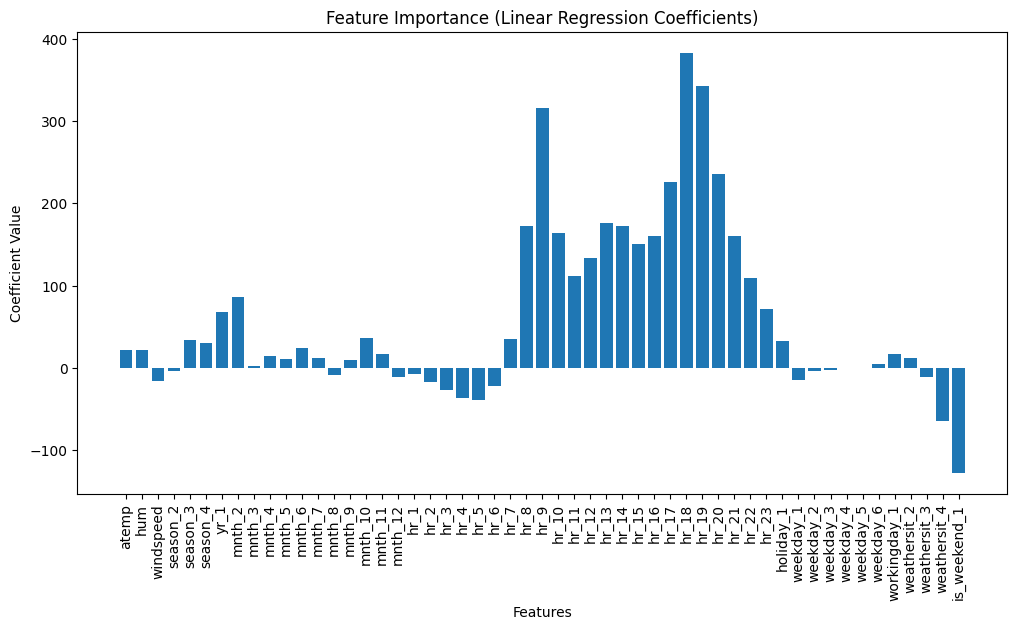

In [ ]:
coefficients = linear_regressor.coef_
features = X.columns

plt.figure(figsize=(12, 6))
plt.bar(features, coefficients)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]


In [ ]:
results = {}

for a in alpha:
    # Initialize Lasso regression with the current alpha
    lasso = linear_model.Lasso(alpha=a, random_state=42, max_iter=10000)

    # Train the model
    lasso.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lasso.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[a] = {"mse": mse, "r2": r2}

results_df = pd.DataFrame(results).T
best_alpha = results_df["mse"].idxmin()

print("Best alpha:", best_alpha)
print("Results:")
results_df


Best alpha: 0.01
Results:


,mse,r2
0.0001,10100.595079,0.681021
0.0010,10099.611086,0.681052
0.0100,10091.571781,0.681306
0.1000,10117.923686,0.680474
1.0000,11297.941210,0.643209
10.0000,22677.126069,0.283852
100.0000,31696.431667,-0.000980


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
ridge_results = {}

for a in alpha:
    # Initialize Lasso regression with the current alpha
    ridge = linear_model.Ridge(alpha=a, random_state=42, max_iter=10000)

    # Train the model
    ridge.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ridge.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    ridge_results[a] = {"mse": mse, "r2": r2}

ridge_results = pd.DataFrame(ridge_results).T
best_alpha = ridge_results["mse"].idxmin()

print("Best alpha:", best_alpha)
print("Results:")
ridge_results

Best alpha: 1.0
Results:


,mse,r2
0.0001,10100.705406,0.681018
0.0010,10100.695538,0.681018
0.0100,10100.597431,0.681021
0.1000,10099.670208,0.681050
1.0000,10094.097629,0.681226
10.0000,10133.715512,0.679975
100.0000,10773.560171,0.659769


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
elasticnet_results = {}

for a in alpha:
    # Initialize elasticnet regression with the current alpha
    elasticnet = linear_model.ElasticNet(alpha=a, random_state=42, max_iter=10000)

    # Train the model
    elasticnet.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = elasticnet.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    elasticnet_results[a] = {"mse": mse, "r2": r2}

elasticnet_results = pd.DataFrame(elasticnet_results).T
best_alpha = elasticnet_results["mse"].idxmin()

print("Best alpha:", best_alpha)
print("Results:")
elasticnet_results

Best alpha: 0.0001
Results:


,mse,r2
0.0001,10095.364907,0.681186
0.0010,10111.961272,0.680662
0.0100,10580.786573,0.665857
0.1000,14224.394024,0.550791
1.0000,21838.380008,0.310340
10.0000,29026.283789,0.083344
100.0000,31611.958966,0.001688


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

In [ ]:
# targets
targets = ['casual', 'registered']

# target variables, features already defined previously
y_multi = df[targets]

print("Features (X):")
print(X.head())

print("Targets (y_multi):")
print(y_multi.head())


Features (X):
       temp     atemp       hum  windspeed  season_2  season_3  season_4  \
0 -1.334648 -1.093281  0.947372  -1.553889       0.0       0.0       0.0   
1 -1.438516 -1.181732  0.895539  -1.553889       0.0       0.0       0.0   
2 -1.438516 -1.181732  0.895539  -1.553889       0.0       0.0       0.0   
3 -1.334648 -1.093281  0.636370  -1.553889       0.0       0.0       0.0   
4 -1.334648 -1.093281  0.636370  -1.553889       0.0       0.0       0.0   

   yr_1  mnth_2  mnth_3  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
0   0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
1   0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
2   0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
3   0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
4   0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   

   weekday_5  weekday_6  workingday_1  weathersit_2  weathersit_3  \
0  

In [ ]:
# training and test data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size=0.2, random_state=42)

print("X_train shape:", X_train_multi.shape)
print("X_test shape:", X_test_multi.shape)
print("y_train shape:", y_train_multi.shape)
print("y_test shape:", y_test_multi.shape)


X_train shape: (13903, 53)
X_test shape: (3476, 53)
y_train shape: (13903, 2)
y_test shape: (3476, 2)


In [ ]:
# Initialize and train the Linear Regression model for multi-output
linear_regressor_multi = linear_model.LinearRegression()
linear_regressor_multi.fit(X_train_multi, y_train_multi)

# Make predictions for both targets
y_pred_multi = linear_regressor_multi.predict(X_test_multi)

# Calculate error metrics for both targets
mse_multi = mean_squared_error(y_test_multi, y_pred_multi, multioutput='uniform_average')
r2_multi = r2_score(y_test_multi, y_pred_multi, multioutput='uniform_average')

# Results
mse_multi, r2_multi

(4055.1678818620685, 0.6304532145808445)

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
